Convert Dataset to tfrecord

In [17]:
import tensorflow as tf
import os
from IPython.display import clear_output

In [18]:

# Step 1: Define a function that takes an image file name and a mask file name as inputs, and returns a serialized example object
def create_example(image_file, mask_file):
  # Read the image and mask files as bytes
  image_data = tf.io.read_file(image_file)
  mask_data = tf.io.read_file(mask_file)

  # Decode the image and mask data as tensors
  image = tf.image.decode_jpeg(image_data)
  mask = tf.image.decode_png(mask_data)

  # Get the height, width and channels of the image and mask
  height = image.shape[0]
  width = image.shape[1]
  channels = image.shape[2]

  # Create a feature dictionary that contains the encoded image data, the encoded mask data, and some other features
  feature = {
    'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_data.numpy()])),
    'mask': tf.train.Feature(bytes_list=tf.train.BytesList(value=[mask_data.numpy()])),
    'height': tf.train.Feature(int64_list=tf.train.Int64List(value=[height])),
    'width': tf.train.Feature(int64_list=tf.train.Int64List(value=[width])),
    'channels': tf.train.Feature(int64_list=tf.train.Int64List(value=[channels]))
  }

  # Create an example object from the feature dictionary
  example = tf.train.Example(features=tf.train.Features(feature=feature))

  # Serialize the example object to a string
  return example.SerializeToString()

# Step 2: Create a TFRecordWriter object that can write examples to a TFRecord file
tfrecord_file = 'dataset.tfrecord'
writer = tf.io.TFRecordWriter(tfrecord_file)

# Step 3: Loop over your images and masks directories, and for each pair of files, call the function from step 1 and write the result to the TFRecord file using the writer from step 
images_dir = 'LabeledTomatoLeaves/images'
masks_dir = 'LabeledTomatoLeaves/labels'

for image_file in os.listdir(images_dir):
  
   # Get the corresponding mask file name by replacing .jpg with .png
    mask_file = ""
    print(image_file)
    if image_file.endswith('.jpg'):
        mask_file = image_file.replace('.jpg', '.png')
    elif image_file.endswith('.JPG'):
        mask_file = image_file.replace('.JPG', '.png')
    elif image_file.endswith('.jpeg'):
        mask_file = image_file.replace('.jpeg', '.png')
    else:
        continue

    print(mask_file)
      
    #    mask_file = image_file.replace('.JPG', '.png')

    # Get the full paths of the image and mask files
    image_path = os.path.join(images_dir, image_file)
    mask_path = os.path.join(masks_dir, mask_file)

    # Call the function from step 1 to create a serialized example object
    example = create_example(image_path, mask_path)

    # Write the example object to the TFRecord file using the writer from step 
    writer.write(example)

# Step : Close the writer when done
writer.close()

image (222).JPG
image (222).png
image (26).JPG
image (26).png
tomatoes_002_full_width.jpg
tomatoes_002_full_width.png
image (5).JPG
image (5).png
Tomato-diseases-prevention-treatment--Early-blight-_jpg.rf.218d855be5666cc2019881969d402d66.jpg
Tomato-diseases-prevention-treatment--Early-blight-_jpg.rf.218d855be5666cc2019881969d402d66.png
image (218).JPG
image (218).png
image (10).JPG
image (10).png
h80_hight.jpg
h80_hight.png
bacterialspot1.jpg
bacterialspot1.png
tomato-early-blight-1_jpg.rf.8b480156e5d50b37f7de7031d6663c32.jpg
tomato-early-blight-1_jpg.rf.8b480156e5d50b37f7de7031d6663c32.png
image (9).JPG
image (9).png
tomato-early-blightH_jpg.rf.e30fcdfe9db62ad8e8c774e36002455d.jpg
tomato-early-blightH_jpg.rf.e30fcdfe9db62ad8e8c774e36002455d.png
image (8).JPG
image (8).png
IMG_4153.jpeg
IMG_4153.png
9AF14E8B-4CD0-4E06-9D10-EB406F9E5927.JPG
9AF14E8B-4CD0-4E06-9D10-EB406F9E5927.png
h38_hight.jpg
h38_hight.png
image (11).JPG
image (11).png
earlyblight-trinidad.jpg
earlyblight-trinidad.png

Open tfrecord to verify it was saved

In [19]:
# Step 1: Create a TFRecordDataset object that can read examples from a TFRecord file
tfrecord_file = 'dataset.tfrecord'
dataset = tf.data.TFRecordDataset(tfrecord_file)

# Step 2: Define a function that takes a serialized example object as input, and parses it using tf.io.parse_single_example with the same feature dictionary that you used to create the example object
def parse_example(example):
  # Define the feature dictionary
  feature = {
    'image': tf.io.FixedLenFeature([], tf.string),
    'mask': tf.io.FixedLenFeature([], tf.string),
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'channels': tf.io.FixedLenFeature([], tf.int64)
  }

  # Parse the example using the feature dictionary
  parsed_example = tf.io.parse_single_example(example, feature)

  # Decode the image and mask data as tensors
  image = tf.image.decode_jpeg(parsed_example['image'])
  mask = tf.image.decode_png(parsed_example['mask'])

  # Return the image and mask tensors
  return image, mask

# Step : Map the function from step to the dataset from step using tf.data.Dataset.map method
dataset = dataset.map(parse_example)

# Step : Iterate over the dataset using tf.data.Dataset.make_one_shot_iterator or tf.data.Dataset.as_numpy_iterator methods
# iterator = dataset.make_one_shot_iterator()
# for image, mask in iterator:
#    # Do something with image and mask tensors
#    print(image)

# Alternatively, you can use as_numpy_iterator method to get numpy arrays instead of tensors
for image, mask in dataset.as_numpy_iterator():
  print(image[:5], mask[:5])

[[[103  92  98]
  [114 103 109]
  [112 101 107]
  ...
  [119 108 112]
  [128 117 121]
  [154 143 147]]

 [[137 126 132]
  [128 117 123]
  [110  99 105]
  ...
  [143 132 136]
  [152 141 145]
  [154 143 147]]

 [[130 119 125]
  [126 115 121]
  [112 101 107]
  ...
  [148 137 141]
  [155 144 148]
  [148 137 141]]

 [[113 102 108]
  [113 102 108]
  [107  96 102]
  ...
  [138 127 131]
  [139 128 132]
  [142 131 135]]

 [[120 109 113]
  [108  97 101]
  [ 98  87  91]
  ...
  [143 132 136]
  [140 129 133]
  [141 130 134]]] [[[  0   0   0]
  [106  61 154]
  [106  61 154]
  ...
  [106  61 154]
  [106  61 154]
  [106  61 154]]

 [[106  61 154]
  [106  61 154]
  [106  61 154]
  ...
  [106  61 154]
  [106  61 154]
  [106  61 154]]

 [[106  61 154]
  [106  61 154]
  [106  61 154]
  ...
  [106  61 154]
  [106  61 154]
  [106  61 154]]

 [[106  61 154]
  [106  61 154]
  [106  61 154]
  ...
  [106  61 154]
  [106  61 154]
  [106  61 154]]

 [[106  61 154]
  [106  61 154]
  [106  61 154]
  ...
  [106  61

(2, 256, 256, 3)


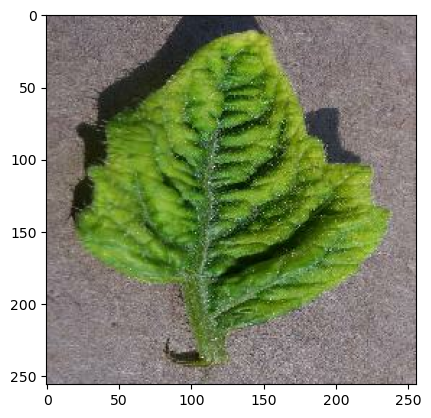

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plt.figure(figsize=(30, 30))
# for images, labels in dataset.take(1):
#   for i in range(10):
#     # ax = plt.subplot(4, 4, i + 1)
#     # plt.imshow(images[i].numpy().astype("uint8"))
#     # # plt.title(class_names[labels[i]])
#     # plt.axis("off")
#     print(images[i].shape, labels[i].shape)

# plt.figure(figsize=(30, 30))
# for sample in dataset.take(1):
#   for i in range(10):
#     ax = plt.subplot(4, 4, i + 1)
#     plt.imshow(sample[i].numpy().astype("uint8"))
#     # plt.title(class_names[labels[i]])
#     plt.axis("off")
#     # print(sample[i].shape, sample[i+1].shape)

iter = dataset.as_numpy_iterator()
item = iter.next()
item = np.array(item)
print(item.shape) 
plt.imshow(item[0])


functions

In [21]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

# def load_image(datapoint):
#   input_image = tf.image.resize(datapoint[0], (128, 128))
#   input_mask = tf.image.resize(
#     datapoint[1],
#     (128, 128),
#     method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
#   )

#   input_image, input_mask = normalize(input_image, input_mask)

#   return input_image, input_mask
def load_image(image, mask):
  input_image = tf.image.resize(image, (128, 128))
  input_mask = tf.image.resize(
    mask,
    (128, 128),
    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
  )

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

split dataset

In [22]:
DATASET_SIZE = dataset.reduce(0, lambda x,_: x+1).numpy()
print(DATASET_SIZE)

train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.2 * DATASET_SIZE)
# test_size = int(0.15 * DATASET_SIZE)

dataset = dataset.shuffle(9)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

2023-03-09 22:37:17.445322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66


In [23]:
TRAIN_LENGTH = train_dataset.reduce(0, lambda x,_: x+1).numpy()
VALIDATION_LENGTH = test_dataset.reduce(0, lambda x,_: x+1).numpy()
BATCH_SIZE = 1
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train_images = train_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_images = test_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

# ting = train_dataset.as_numpy_iterator().next()
# image, label = load_image(ting[0], ting[1])

count = 0

for images, labels in train_images.take(TRAIN_LENGTH):
    count += 1
    # print(images.shape, labels.shape)
print(count)
count = 0
for images, labels in test_images.take(VALIDATION_LENGTH):
    count += 1
    # print(images.shape, labels.shape)
print(count)

2023-03-09 22:37:18.187174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-09 22:37:18.864434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


52
14


The following class performs a simple augmentation by randomly-flipping an image. 
Build the input pipeline, applying the augmentation after batching the inputs:

In [24]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels
  
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)

print(train_batches.element_spec[0].shape)
print(test_batches.element_spec[0].shape)


for images, labels in train_batches.take(1):
    print(images.shape)
    print(labels.shape)

for images, labels in test_batches.take(1):
    print(images.shape)
    print(labels.shape)

count = 0

for images, labels in train_batches.take(TRAIN_LENGTH):
    count += 1
    # print(images.shape, labels.shape)
print(count)
count = 0
for images, labels in test_batches.take(VALIDATION_LENGTH):
    count += 1
    # print(images.shape, labels.shape)
print(count)

(None, 128, 128, None)
(None, 128, 128, None)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 3)
52
14


Visualize an image example and its corresponding mask from the dataset:

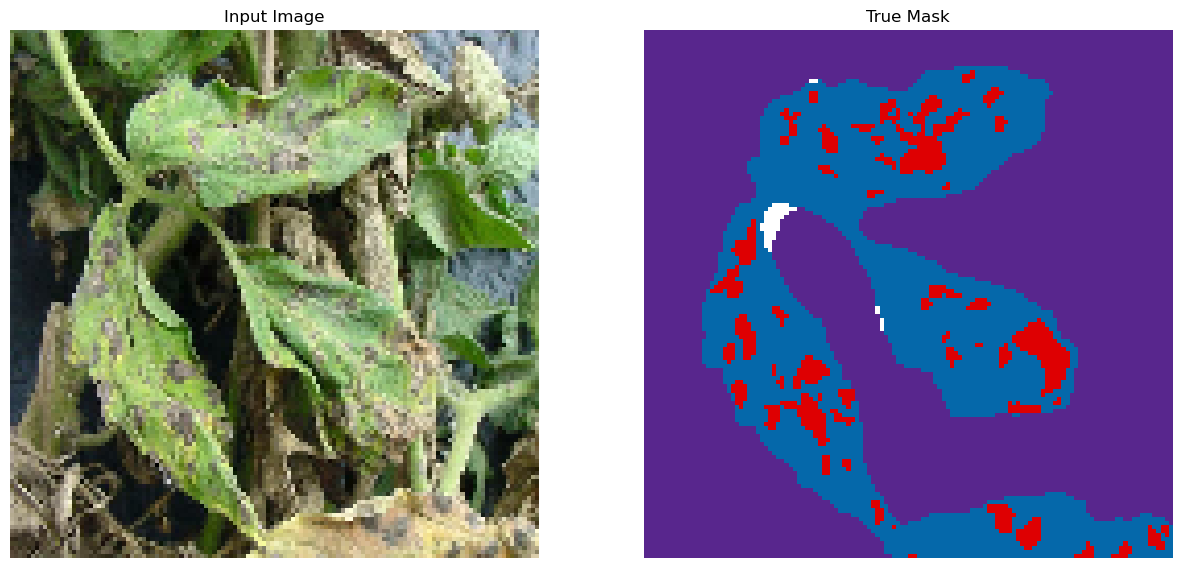

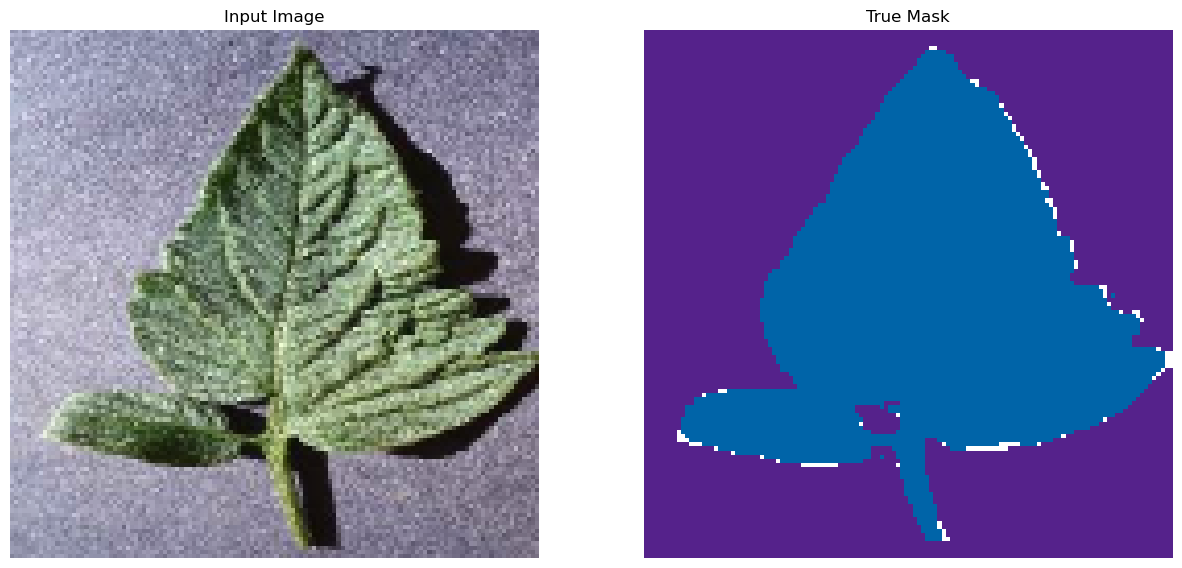

In [25]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

for images, masks in train_batches.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

Define the model

The model being used here is a modified U-Net. A U-Net consists of an encoder (downsampler) and decoder (upsampler). To learn robust features and reduce the number of trainable parameters, use a pretrained model—MobileNetV2—as the encoder. For the decoder, you will use the upsample block, which is already implemented in the pix2pix example in the TensorFlow Examples repo. (Check out the pix2pix: Image-to-image translation with a conditional GAN tutorial in a notebook.)

As mentioned, the encoder is a pretrained MobileNetV2 model. You will use the model from tf.keras.applications. The encoder consists of specific outputs from intermediate layers in the model. Note that the encoder will not be trained during the training process.

In [26]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

The decoder/upsampler is simply a series of upsample blocks implemented in TensorFlow examples:

In [27]:
from tensorflow_examples.models.pix2pix import pix2pix


up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [28]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

Train the model

Now, all that is left to do is to compile and train the model.

Since this is a multiclass classification problem, use the tf.keras.losses.CategoricalCrossentropy loss function with the from_logits argument set to True, since the labels are scalar integers instead of vectors of scores for each pixel of every class.

When running inference, the label assigned to the pixel is the channel with the highest value. This is what the create_mask function is doing.

In [29]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Try out the model to check what it predicts before training:

2023-03-09 22:37:24.282702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 641ms/step


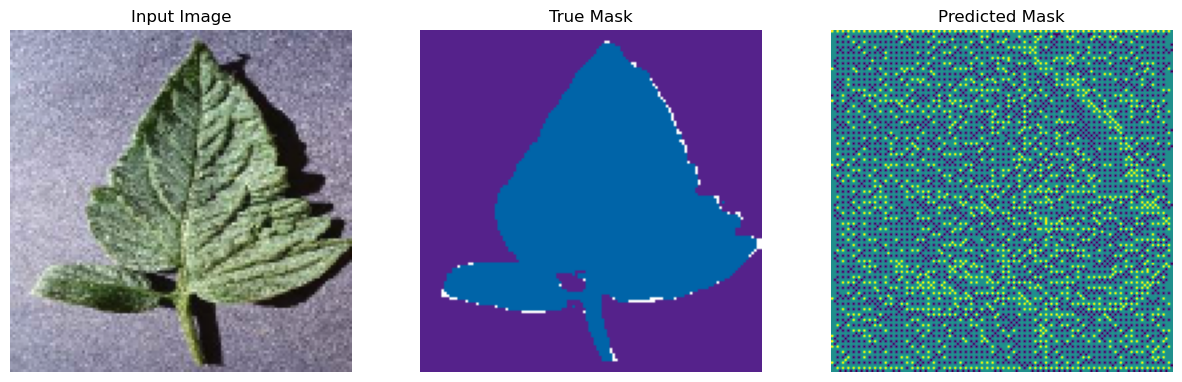

In [30]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])
    
show_predictions()

The callback defined below is used to observe how the model improves while it is training:



In [31]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

1/1 [==============================] - 0s 31ms/step


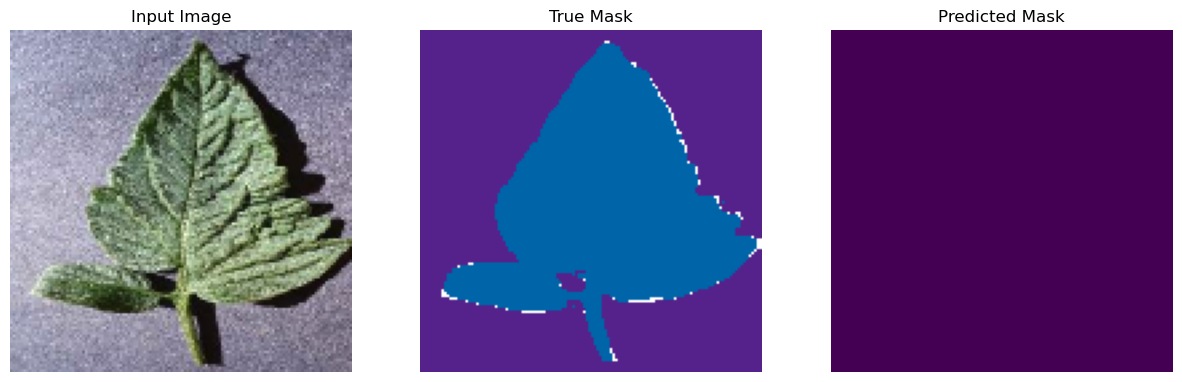


Sample Prediction after epoch 41

52/52 [==============================] - 2s 47ms/step - loss: 3301.9561 - accuracy: 0.9556 - val_loss: 3292.3652 - val_accuracy: 0.9951
Epoch 42/100
25/52 [=============>................] - ETA: 0s - loss: 3481.2695 - accuracy: 0.9491

KeyboardInterrupt: 

In [32]:
EPOCHS = 100
VAL_SUBSPLITS = 5
VALIDATION_STEPS = VALIDATION_LENGTH//BATCH_SIZE//VAL_SUBSPLITS

history = model.fit(train_batches, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_batches,
                          callbacks=[DisplayCallback()])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()